In [2]:
#technologies
from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import pandas as pd
import folium



In [3]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')

In [4]:
# Create or connect to the 'energy_data' database
db = client['energy_data']
# Create the new collection for coal, gas and oil
collection = db["coal_gas_oil_data_collection"]

In [5]:

# Load the CSV file using pandas
# Correct file path for your environment
file_path = "C:/Users/zarap/OneDrive/UofT BootCamp/Class Project/project3_world_energy_consumption/World Energy Consumption - Kaggle/World Energy Consumption.csv"
df = pd.read_csv(file_path)

# Display the DataFrame to verify the data
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


C:\Users\zarap\AppData\Local\Temp\ipykernel_18384\1654110220.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_energy_grouped_period = df_energy_corrected.groupby('time_period')[energy_columns_corrected].sum()


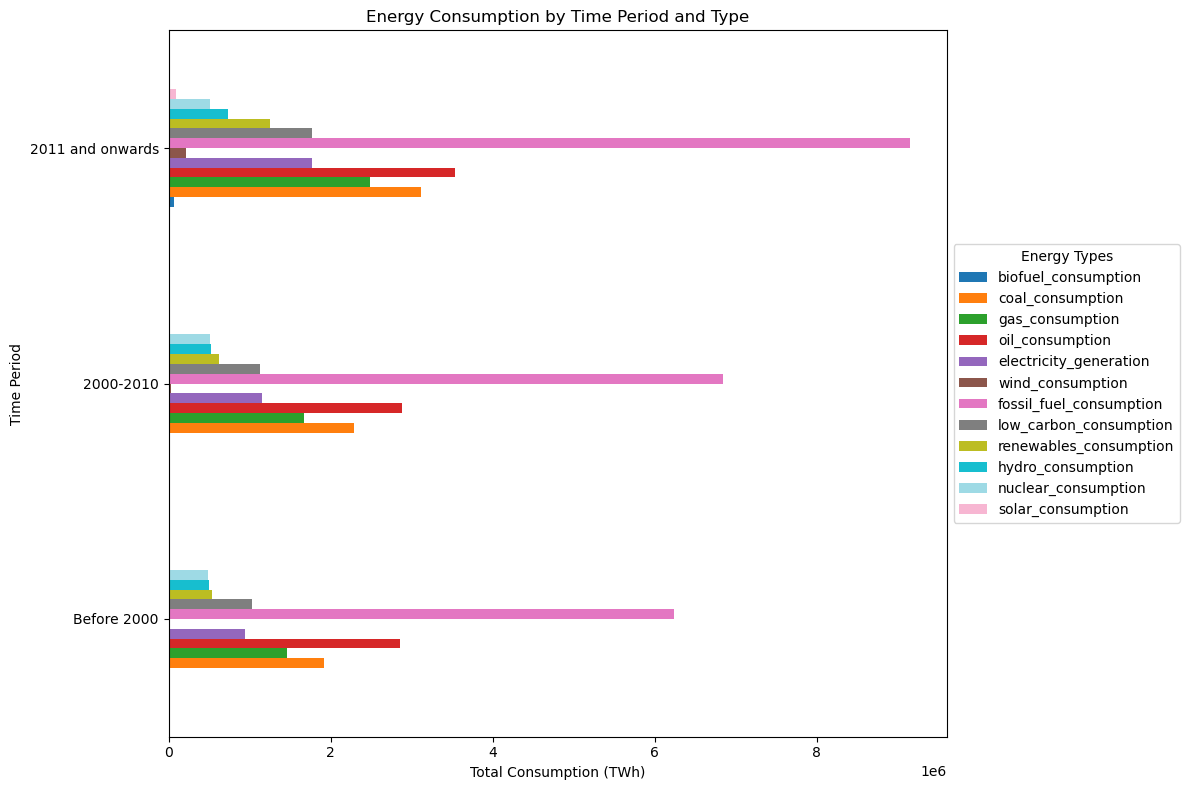

In [6]:
# Define the energy columns (excluding 'year') and filter the data
energy_columns_corrected = [
    'biofuel_consumption', 'coal_consumption', 'gas_consumption',
    'oil_consumption', 'electricity_generation', 'wind_consumption',
    'fossil_fuel_consumption', 'low_carbon_consumption', 
    'renewables_consumption', 'hydro_consumption', 'nuclear_consumption', 
    'solar_consumption'
]

# Filter the dataset to include only the relevant columns
df_energy_corrected = df[['year'] + energy_columns_corrected].dropna()

# Define the time periods and group by these periods
bins = [df_energy_corrected['year'].min(), 1999, 2010, df_energy_corrected['year'].max()]
labels = ['Before 2000', '2000-2010', '2011 and onwards']
df_energy_corrected['time_period'] = pd.cut(df_energy_corrected['year'], bins=bins, labels=labels)

# Group data by time period and sum the energy types (excluding 'year')
df_energy_grouped_period = df_energy_corrected.groupby('time_period')[energy_columns_corrected].sum()

# Define a color palette with distinct colors
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#9edae5', '#f7b6d2'
]

# Plot the data with the custom color palette
ax = df_energy_grouped_period.plot(kind='barh', figsize=(12, 8), color=colors)


plt.title('Energy Consumption by Time Period and Type')
plt.xlabel('Total Consumption (TWh)')
plt.ylabel('Time Period')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Energy Types")
plt.tight_layout()
plt.show()


In [7]:
#total rows  
df.count()

country                   22012
year                      22012
iso_code                  16512
population                18123
gdp                       11113
                          ...  
wind_elec_per_capita       7065
wind_electricity           7996
wind_energy_per_capita     4065
wind_share_elec            6886
wind_share_energy          4101
Length: 129, dtype: int64

In [8]:
# Inspect the columns 
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [9]:
#Check for null values in the DataFrame
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64


In [10]:
# Remove rows with null values
df_cleaned = df.dropna()  # Removes any rows with null values
print("\nDataFrame after removing rows with null values:")
df_cleaned.head(10)


DataFrame after removing rows with null values:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359700e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274050e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473050e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259810e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160
1076,Argentina,2016,ARG,43668236.0,8.283730e+11,5.989,0.906,367.251,16.037,24.503,...,0.007,0.004,-7.749,-0.133,1.465,12.366,0.54,33.555,0.387,0.148
2966,Brazil,2013,BRA,201721776.0,3.112910e+12,16.904,24.974,856.203,172.715,194.674,...,0.000,0.000,30.215,4.075,17.922,32.619,6.58,88.845,1.168,0.516
2967,Brazil,2014,BRA,203459648.0,3.128570e+12,9.678,16.715,931.044,189.430,221.911,...,0.003,0.001,85.683,15.157,33.079,60.012,12.21,162.581,2.098,0.928
2968,Brazil,2015,BRA,205188208.0,3.270710e+12,16.967,32.141,1079.843,221.571,231.690,...,0.010,0.005,77.111,25.159,58.237,104.636,21.47,283.824,3.756,1.656
2969,Brazil,2016,BRA,206859584.0,2.889040e+12,-9.000,-19.942,974.715,201.629,237.552,...,0.014,0.007,54.857,31.414,89.651,160.689,33.24,433.390,5.817,2.612


In [12]:
#total rows after removing nulls
df_cleaned.count()

country                   194
year                      194
iso_code                  194
population                194
gdp                       194
                         ... 
wind_elec_per_capita      194
wind_electricity          194
wind_energy_per_capita    194
wind_share_elec           194
wind_share_energy         194
Length: 129, dtype: int64

In [13]:
# Remove duplicate rows based on all columns 
df_no_duplicates = df_cleaned.drop_duplicates()  
print("\nDataFrame after removing duplicates:")
df_no_duplicates.head()


DataFrame after removing duplicates:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359700e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274050e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473050e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259810e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [14]:
print("\nShape of the DataFrame after cleaning (rows, columns):", df_no_duplicates.shape)



Shape of the DataFrame after cleaning (rows, columns): (194, 129)


In [15]:
# Check data types
print("Data Types:")
print(df_cleaned.dtypes)

Data Types:
country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object


In [16]:
# Get summary statistics
print("Statistical Summary:")
print(df_cleaned.describe())

Statistical Summary:
              year    population           gdp  biofuel_cons_change_pct  \
count   194.000000  1.940000e+02  1.940000e+02               194.000000   
mean   2010.412371  8.307047e+07  2.895157e+12                49.849423   
std       4.853827  8.644717e+07  4.303275e+12               226.157606   
min    2000.000000  2.074923e+06  5.279414e+10               -91.427000   
25%    2007.000000  3.169251e+07  4.438345e+11                -1.284000   
50%    2011.000000  5.279418e+07  1.496485e+12                 8.374000   
75%    2014.000000  1.065257e+08  2.882628e+12                26.149250   
max    2018.000000  3.321400e+08  1.814060e+13              2666.627000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count               194.000000               194.000000           194.000000   
mean                  2.932918               241.931165            34.794727   
std                   8.934901               295.799856        

In [17]:
# Define the required columns
columns_to_keep = [
    'country', 'year', 'iso_code', 'population', 'gdp', 'coal_cons_change_pct', 
    'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 
    'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 
    'coal_production', 'coal_share_elec', 'coal_share_energy', 'gas_cons_change_pct', 
    'gas_cons_change_twh', 'gas_consumption', 'gas_elec_per_capita', 'gas_electricity', 
    'gas_energy_per_capita', 'gas_prod_change_pct', 'gas_prod_change_twh', 'gas_prod_per_capita', 
    'gas_production', 'gas_share_elec', 'gas_share_energy', 'oil_cons_change_pct', 
    'oil_cons_change_twh', 'oil_consumption', 'oil_elec_per_capita', 'oil_electricity', 
    'oil_energy_per_capita', 'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita', 
    'oil_production', 'oil_share_elec', 'oil_share_energy'
]

# Filter the DataFrame to keep only the required columns
df_final = df_cleaned[columns_to_keep]

#  Round numeric columns to 2 decimal places
df_final = df_final.round(2)

# Display the shape and first few rows to verify
print(f"Shape of the DataFrame after column filtering (rows, columns): {df_final.shape}")
df_final.head()

Shape of the DataFrame after column filtering (rows, columns): (194, 41)


,country,year,iso_code,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,...,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359700e+11,8.51,1.15,352.08,14.62,65.99,...,339.91,430.39,17.87,8186.56,-6.29,-24.34,8735.04,362.68,14.56,37.39
1072,Argentina,2012,ARG,41952364.0,8.274050e+11,-6.50,-0.95,325.83,13.67,59.12,...,360.51,429.06,18.00,8593.35,-1.10,-4.01,8549.65,358.68,13.99,38.20
1073,Argentina,2013,ARG,42388268.0,8.473050e+11,9.29,1.27,352.44,14.94,52.61,...,382.58,459.80,19.49,9025.61,-2.12,-7.62,8282.07,351.06,14.73,38.98
1074,Argentina,2014,ARG,42824064.0,8.259810e+11,6.38,0.95,371.09,15.89,56.04,...,379.92,419.86,17.98,8871.54,-1.32,-4.65,8089.25,346.42,13.64,38.77
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.49,-0.08,365.58,15.81,51.78,...,387.81,476.92,20.63,8965.24,0.87,3.02,8078.02,349.43,14.97,38.90


In [18]:
df_final.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita',
       'coal_consumption', 'coal_elec_per_capita', 'coal_electricity',
       'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita',
       'coal_production', 'coal_share_elec', 'coal_share_energy',
       'gas_cons_change_pct', 'gas_cons_change_twh', 'gas_consumption',
       'gas_elec_per_capita', 'gas_electricity', 'gas_energy_per_capita',
       'gas_prod_change_pct', 'gas_prod_change_twh', 'gas_prod_per_capita',
       'gas_production', 'gas_share_elec', 'gas_share_energy',
       'oil_cons_change_pct', 'oil_cons_change_twh', 'oil_consumption',
       'oil_elec_per_capita', 'oil_electricity', 'oil_energy_per_capita',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita',
       'oil_production', 'oil_share_elec', 'oil_share_energy'],
      dtype='object')

In [19]:

# check DataFrame shape after removing columns
print("\nShape of the DataFrame after column removal (rows, columns):", df_final.shape)


Shape of the DataFrame after column removal (rows, columns): (194, 41)


In [20]:
# Iterate over the DataFrame rows and insert them into MongoDB
for index, row in df_final.iterrows():
    # Convert each row to a dictionary for MongoDB insertion
    collection.insert_one(row.to_dict())

print("Cleaned DataFrame inserted successfully into MongoDB!")



Cleaned DataFrame inserted successfully into MongoDB!


In [21]:
# Fetch the first 5 records from MongoDB and convert them to a DataFrame
records = list(collection.find()) 
df_mongo = pd.DataFrame(records)
#  Display the DataFrame containing the records
print("\nDataFrame containing the records from MongoDB:")
df_mongo.round(2)


DataFrame containing the records from MongoDB:


,_id,country,year,iso_code,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,...,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
0,670ed92bfc7320ebb94c1b8a,Argentina,2011,ARG,41520736.0,8.359700e+11,8.51,1.15,352.08,14.62,...,339.91,430.39,17.87,8186.56,-6.29,-24.34,8735.04,362.68,14.56,37.39
1,670ed92cfc7320ebb94c1b8b,Argentina,2012,ARG,41952364.0,8.274050e+11,-6.50,-0.95,325.83,13.67,...,360.51,429.06,18.00,8593.35,-1.10,-4.01,8549.65,358.68,13.99,38.20
2,670ed92cfc7320ebb94c1b8c,Argentina,2013,ARG,42388268.0,8.473050e+11,9.29,1.27,352.44,14.94,...,382.58,459.80,19.49,9025.61,-2.12,-7.62,8282.07,351.06,14.73,38.98
3,670ed92cfc7320ebb94c1b8d,Argentina,2014,ARG,42824064.0,8.259810e+11,6.38,0.95,371.09,15.89,...,379.92,419.86,17.98,8871.54,-1.32,-4.65,8089.25,346.42,13.64,38.77
4,670ed92cfc7320ebb94c1b8e,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.49,-0.08,365.58,15.81,...,387.81,476.92,20.63,8965.24,0.87,3.02,8078.02,349.43,14.97,38.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,6711a6428475720cf601eeb6,United States,2014,USA,322033952.0,1.648270e+13,-0.23,-11.42,15560.02,5010.86,...,9693.27,135.67,43.69,30100.14,16.95,884.49,18950.03,6102.55,1.07,37.29
1742,6711a6428475720cf601eeb7,United States,2015,USA,324607776.0,1.690260e+13,-13.61,-681.78,13336.33,4329.08,...,9890.72,136.90,44.44,30469.75,8.09,493.39,20319.73,6595.94,1.09,38.42
1743,6711a6428475720cf601eeb8,United States,2016,USA,327210208.0,1.716260e+13,-8.51,-368.34,12104.58,3960.74,...,9961.58,120.72,39.50,30443.96,-4.30,-283.76,19290.91,6312.18,0.97,38.73
1744,6711a6428475720cf601eeb9,United States,2017,USA,329791232.0,1.759630e+13,-2.73,-108.15,11681.91,3852.59,...,10057.78,114.89,37.89,30497.40,5.80,366.38,20250.89,6678.56,0.94,38.96


In [22]:
df_describe=df_mongo.describe()
df_describe.round(2)

,year,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,...,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
count,1746.00,1.746000e+03,1.746000e+03,1746.00,1746.00,1746.00,1746.00,1746.00,1746.00,1746.00,...,1746.00,1746.00,1746.00,1746.00,1746.00,1746.00,1746.00,1746.00,1746.00,1746.00
mean,2010.41,8.307047e+07,2.895157e+12,-1.31,-15.22,8854.69,877.30,2282.66,253.29,-4.89,...,1761.32,268.74,25.11,16453.93,-1.54,20.89,10924.48,1013.28,5.06,35.67
std,4.84,8.624878e+07,4.293399e+12,13.20,107.50,6664.30,1579.36,1807.39,501.52,16.04,...,2887.21,252.35,35.72,10462.76,16.10,139.47,17817.89,1600.96,6.67,10.68
min,2000.00,2.074923e+06,5.279414e+10,-49.10,-750.68,279.12,12.19,41.68,1.82,-100.00,...,27.92,0.00,0.00,2656.00,-56.89,-283.76,1.49,0.00,0.00,11.06
25%,2007.00,3.161946e+07,4.412590e+11,-6.50,-19.65,2969.18,122.07,630.40,24.64,-9.34,...,288.55,84.91,2.85,8186.56,-6.29,-3.90,107.23,4.66,1.12,27.70
50%,2011.00,5.279418e+07,1.496485e+12,-0.88,-1.00,7253.53,231.04,2011.46,57.90,-2.86,...,983.40,204.92,11.92,13387.46,-1.40,-0.32,1338.69,42.66,2.58,35.81
75%,2014.00,1.068868e+08,2.889040e+12,3.70,10.70,12104.58,947.53,3637.94,223.38,2.16,...,1307.22,391.00,26.97,19490.47,1.67,0.79,13790.04,1658.92,5.63,41.05
max,2018.00,3.321400e+08,1.814060e+13,85.46,318.17,23481.75,6346.96,6962.75,2016.46,38.66,...,11214.08,1530.03,195.62,40139.57,143.68,1109.99,80938.41,7788.55,42.38,65.91


In [23]:
# Check the unique countries and years in the DataFrame
print("Unique countries in the dataset:", df_mongo['country'].unique())
print("Unique years in the dataset:", df_mongo['year'].unique())


Unique countries in the dataset: ['Argentina' 'Brazil' 'Bulgaria' 'Canada' 'Czechia' 'France' 'Germany'
 'Hungary' 'Japan' 'Mexico' 'Romania' 'Russia' 'Slovakia' 'Slovenia'
 'South Africa' 'Spain' 'Ukraine' 'United Kingdom' 'United States']
Unique years in the dataset: [2011 2012 2013 2014 2015 2016 2017 2018 2010 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009]


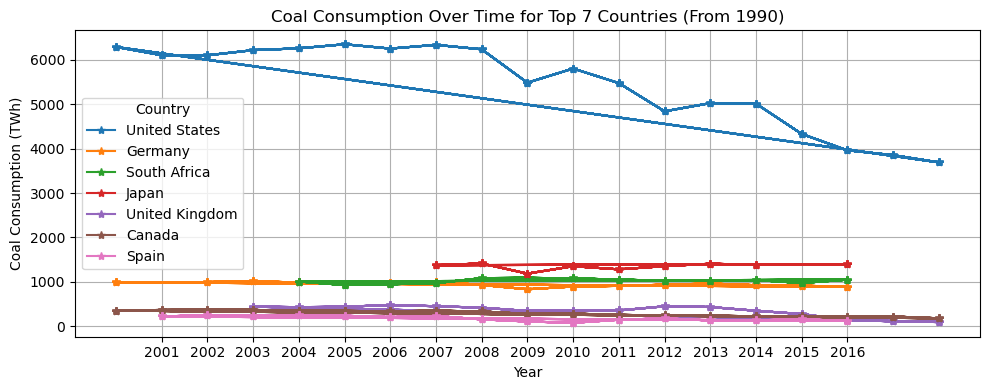

In [24]:

# Filter for the last 20 decades (2000 to 2024)
filtered_df = df_mongo[(df_mongo['year'] >= 2000) & (df_mongo['year'] <= 2024)]

# Get the top 7 countries by total coal consumption
top_countries = filtered_df.groupby('country')['coal_consumption'].sum().nlargest(7).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Coal Consumption
plt.figure(figsize=(10, 4))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['coal_consumption'], marker='*', label=country)

plt.xlabel('Year')
plt.ylabel('Coal Consumption (TWh)')
plt.title('Coal Consumption Over Time for Top 7 Countries (From 1990)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


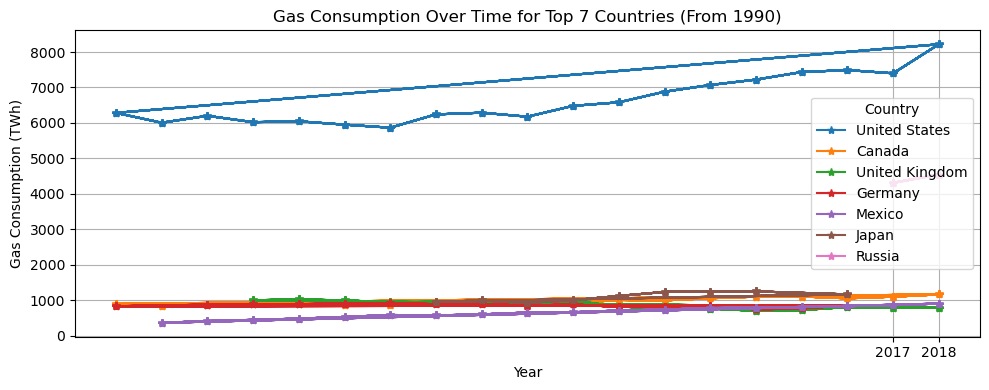

In [25]:

# Filter for the last 20 decades (2000 to 2024)
filtered_df = df_mongo[(df_mongo['year'] >= 2000) & (df_mongo['year'] <= 2024)]

# Get the top 7 countries by total Gas consumption
top_countries = filtered_df.groupby('country')['gas_consumption'].sum().nlargest(7).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Gas Consumption
plt.figure(figsize=(10, 4))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['gas_consumption'], marker='*', label=country)

plt.xlabel('Year')
plt.ylabel('Gas Consumption (TWh)')
plt.title('Gas Consumption Over Time for Top 7 Countries (From 1990)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


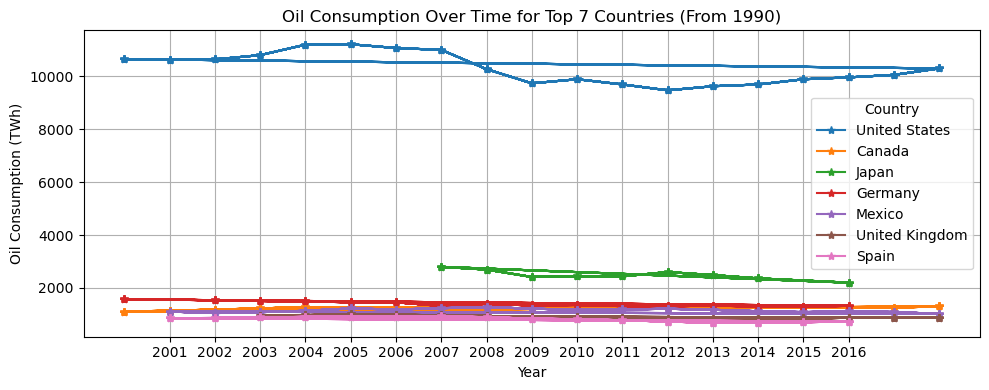

In [26]:

# Filter for the last 20 decades (2000 to 2024)
filtered_df = df_mongo[(df_mongo['year'] >= 2000) & (df_mongo['year'] <= 2024)]

# Get the top 7 countries by total oil consumption
top_countries = filtered_df.groupby('country')['oil_consumption'].sum().nlargest(7).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Oil Consumption
plt.figure(figsize=(10, 4))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['oil_consumption'], marker='*', label=country)

plt.xlabel('Year')
plt.ylabel('Oil Consumption (TWh)')
plt.title('Oil Consumption Over Time for Top 7 Countries (From 1990)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


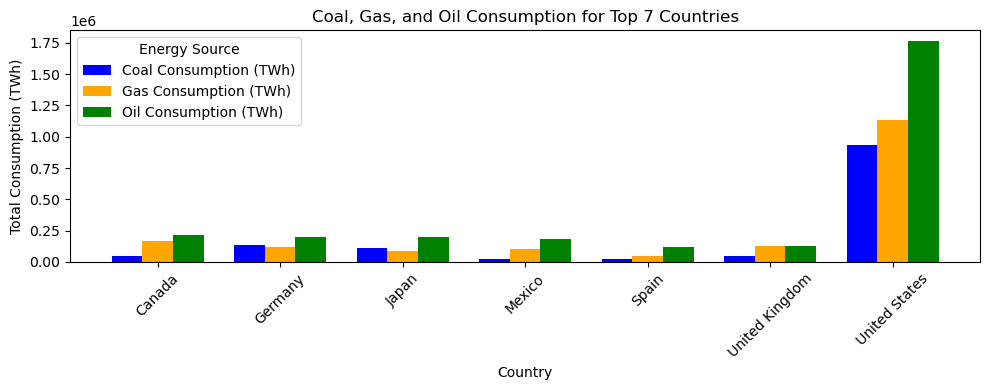

In [27]:
# Filter the data for the years from 2000 to 2024 (same period as the second block of code)
filtered_df = df_mongo[(df_mongo['year'] >= 2000) & (df_mongo['year'] <= 2024)]

# Get the top 7 countries based on oil consumption (same as the second block of code)
top_countries_oil = filtered_df.groupby('country')['oil_consumption'].sum().nlargest(7).index

# Filter data for the top 7 countries based on oil consumption
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries_oil)]

# Group by country and get the total consumption for each resource (coal, gas, and oil)
grouped_data = top_countries_data.groupby('country').agg({
    'coal_consumption': 'sum',
    'gas_consumption': 'sum',
    'oil_consumption': 'sum'
})

# Plotting
bar_width = 0.25
index = np.arange(len(grouped_data))

plt.figure(figsize=(10, 4))

# Create bars for each energy source
plt.bar(index, grouped_data['coal_consumption'], bar_width, label='Coal Consumption (TWh)', color='blue')
plt.bar(index + bar_width, grouped_data['gas_consumption'], bar_width, label='Gas Consumption (TWh)', color='orange')
plt.bar(index + 2 * bar_width, grouped_data['oil_consumption'], bar_width, label='Oil Consumption (TWh)', color='green')

# Labels and titles
plt.xlabel('Country')
plt.ylabel('Total Consumption (TWh)')
plt.title('Coal, Gas, and Oil Consumption for Top 7 Countries')
plt.xticks(index + bar_width, grouped_data.index, rotation=45)

# Legend
plt.legend(title='Energy Source')
plt.tight_layout()
plt.show()

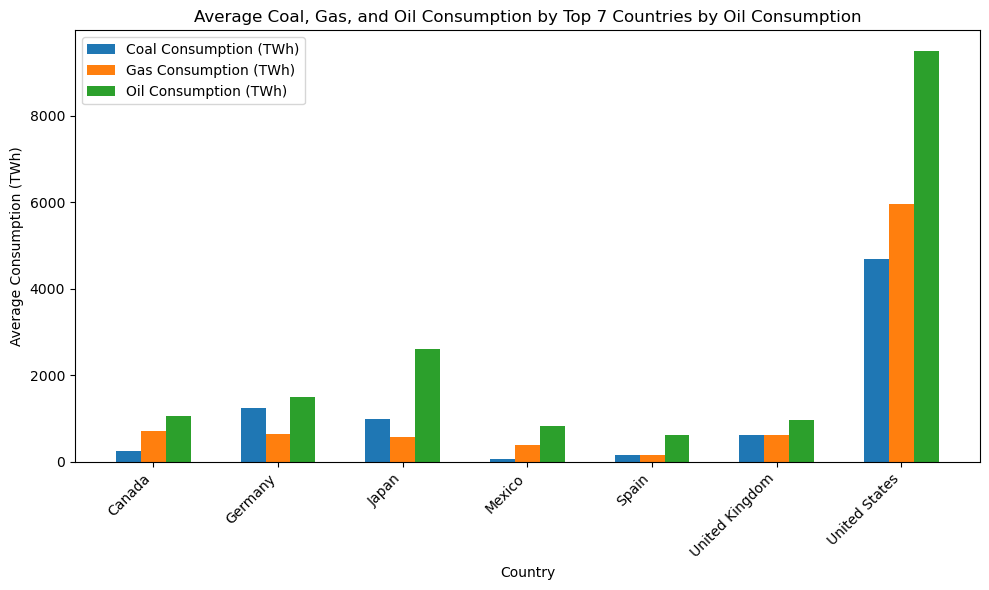

In [28]:
# Calculate average consumption per country
avg_consumption = df.groupby('country').agg({
    'coal_consumption': 'mean',
    'gas_consumption': 'mean',
    'oil_consumption': 'mean'
}).reset_index()

# Use the same top countries identified by oil consumption from the second code block
top_7_countries_oil = avg_consumption[avg_consumption['country'].isin(top_countries_oil)]

# Set the bar width and position
bar_width = 0.2
x = range(len(top_7_countries_oil))

# Plot the bars for coal, gas, and oil consumption
plt.figure(figsize=(10, 6))
plt.bar(x, top_7_countries_oil['coal_consumption'], width=bar_width, label='Coal Consumption (TWh)', color='tab:blue', align='center')
plt.bar([p + bar_width for p in x], top_7_countries_oil['gas_consumption'], width=bar_width, label='Gas Consumption (TWh)', color='tab:orange', align='center')
plt.bar([p + 2 * bar_width for p in x], top_7_countries_oil['oil_consumption'], width=bar_width, label='Oil Consumption (TWh)', color='tab:green', align='center')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Consumption (TWh)')
plt.title('Average Coal, Gas, and Oil Consumption by Top 7 Countries by Oil Consumption')

# Adjust the x-axis ticks to avoid overlap
plt.xticks([p + bar_width for p in x], top_7_countries_oil['country'], rotation=45, ha='right')

# Add legend and adjust layout
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
# Filtered from 2000 to 2024
filtered_df = df_mongo[(df_mongo['year'] >= 2000) & (df_mongo['year'] <= 2024)]

# Get the top 7 countries based on oil consumption
top_countries_oil = filtered_df.groupby('country')['oil_consumption'].sum().nlargest(7).index

# Filter data for the top 7 countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries_oil)]

# Group by country and sum the consumption for each energy source (coal, gas, oil)
grouped_data = top_countries_data.groupby('country').agg({
    'coal_consumption': 'sum',
    'gas_consumption': 'sum',
    'oil_consumption': 'sum'
}).reset_index()

# Convert the data to long format for Plotly
long_format = grouped_data.melt(id_vars='country', 
                                value_vars=['coal_consumption', 'gas_consumption', 'oil_consumption'], 
                                var_name='Energy Source', value_name='Consumption')

# Create the bubble plot using Plotly
fig = px.scatter(long_format, 
                 x='country', 
                 y='Consumption', 
                 size='Consumption',
                 size_max=45, 
                 color='Energy Source',
                 labels={'Consumption':'Consumption (TWh)', 'country':'Country'},
                 title='Coal, Gas, and Oil Consumption for Top 7 Countries (Based on Oil Consumption)',
                 hover_name='country', 
                 hover_data=['Consumption', 'Energy Source'])

# Update axis labels
fig.update_layout(xaxis_title='Country', yaxis_title='Consumption (TWh)')

# Show the plot
fig.show()



In [30]:
# Necessary data
filtered_df = df_mongo[(df_mongo['year'] >= 2000) & (df_mongo['year'] <= 2024)]

# Get the top 7 countries based on oil consumption
top_countries_oil = filtered_df.groupby('country')['oil_consumption'].sum().nlargest(7).index

# Filter data for the top 7 countries
ct = filtered_df[filtered_df['country'].isin(top_countries_oil)]

In [31]:
# Slower animation for coal consumption with Play and Pause buttons
fig_coal = px.bar(ct, x='country', y='coal_consumption', color='country',
                  animation_frame="year", 
                  animation_group="country", 
                  range_y=[0, ct['coal_consumption'].max()], 
                  title=('Coal Consumption for Top 7 Countries<br><sup>Comparing Coal Consumption Over Time</sup>'),
                  labels={'coal_consumption': 'Consumption (TWh)', 'country': 'Country'})

# Adding Play and Pause buttons
fig_coal.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

fig_coal.show()


In [32]:
# Slower animation for gas consumption with Play and Pause buttons
fig_gas = px.bar(ct, x='country', y='gas_consumption', color='country',
                 animation_frame="year", 
                 animation_group="country", 
                 range_y=[0, ct['gas_consumption'].max()], 
                 title=('Gas Consumption for Top 7 Countries<br><sup>Comparing Gas Consumption Over Time</sup>'),
                 labels={'gas_consumption': 'Consumption (TWh)', 'country': 'Country'})

# Adding Play and Pause buttons
fig_gas.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

fig_gas.show()



In [33]:
# Slower animation for oil consumption with Play and Pause buttons
fig_oil = px.bar(ct, x='country', y='oil_consumption', color='country',
                 animation_frame="year", 
                 animation_group="country", 
                 range_y=[0, ct['oil_consumption'].max()], 
                 title=('Oil Consumption for Top 7 Countries<br><sup>Comparing Oil Consumption Over Time</sup>'),
                 labels={'oil_consumption': 'Consumption (TWh)', 'country': 'Country'})

# Adding Play and Pause buttons
fig_oil.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

fig_oil.show()



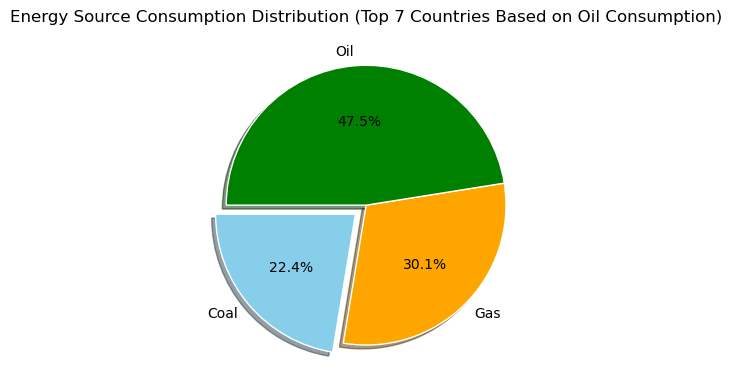

In [34]:
# Filter the data for the years from 2000 to 2024 (same as before)
filtered_df = df_mongo[(df_mongo['year'] >= 2000) & (df_mongo['year'] <= 2024)]

# Get the top 7 countries based on oil consumption (same as before)
top_countries_oil = filtered_df.groupby('country')['oil_consumption'].sum().nlargest(7).index

# Filter data for the top 7 countries based on oil consumption
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries_oil)]

# Group by country and sum the consumption for each energy source (coal, gas, oil)
grouped_data = top_countries_data.groupby('country').agg({
    'coal_consumption': 'sum',
    'gas_consumption': 'sum',
    'oil_consumption': 'sum'
})

# Calculate total consumption for each energy source across the top 7 countries
total_coal = grouped_data['coal_consumption'].sum()
total_gas = grouped_data['gas_consumption'].sum()
total_oil = grouped_data['oil_consumption'].sum()

# Data for the pie chart
labels = ['Coal', 'Gas', 'Oil']
sizes = [total_coal, total_gas, total_oil]
colors = ['skyblue', 'orange', 'green']

# Explode one of the slices for emphasis (exploding the coal slice)
explode = (0.1, 0, 0)  # Exploding coal slice

# Create a pie chart with shadow effect and a balanced layout
fig, ax = plt.subplots(figsize=(8, 4))  # Balanced figure size for width and height

# Adjust the aspect ratio to make the pie chart less stretched horizontally
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=180, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Adjust the aspect ratio for a slightly thicker, more balanced look
ax.set_aspect('equal', 'box')

# Title
plt.title("Energy Source Consumption Distribution (Top 7 Countries Based on Oil Consumption)")

# Adjust layout for better proportions
plt.tight_layout()

# Display the pie chart
plt.show()


In [35]:
# Your GeoAPI API key
from api_keys import api_key 

# List of countries for which you need coordinates
countries = ['Canada','Germany', 'Japan','Mexico','Spain', 'United Kingdom','United States']

# Function to get coordinates for a country
def get_coordinates(country):
    # GeoAPI endpoint for country coordinates
    base_url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={api_key}"
    
    response = requests.get(base_url)
    
    if response.status_code == 200:
        data = response.json()
        # Extracting the first result's latitude and longitude
        if data['features']:
            lat = data['features'][0]['properties']['lat']
            lon = data['features'][0]['properties']['lon']
            return lat, lon
        else:
            return None, None
    else:
        return None, None

# Create a dictionary to store country coordinates
country_coords = {'Country': [], 'Latitude': [], 'Longitude': []}

# Fetch coordinates for each country
for country in countries:
    lat, lon = get_coordinates(country)
    country_coords['Country'].append(country)
    country_coords['Latitude'].append(lat)
    country_coords['Longitude'].append(lon)

# Convert to DataFrame
coords_df = pd.DataFrame(country_coords)

print(coords_df)


          Country   Latitude   Longitude
0          Canada  61.066692 -107.991707
1         Germany  51.163818   10.447831
2           Japan  36.574844  139.239418
3          Mexico  23.658512 -102.007710
4           Spain  39.326068   -4.837979
5  United Kingdom  54.702354   -3.276575
6   United States  39.783730 -100.445882


In [36]:

# energy consumption data
energy_data = {
    'Country': ['Canada','Germany', 'Japan','Mexico','Spain', 'United Kingdom','United States'],
    'Coal Consumption (TWh)': [107.233,	647.222, 1365.525, 69.79, 46.911, 58.722, 2741.221],
    'Gas Consumption (TWh)': [1216.283, 772.9, 1004.983, 965.857, 330.969, 719.801, 8812.123],
    'Oil Consumption (TWh)': [1185.242, 1183.124, 1835.925, 1143.899, 737.947, 741.043, 10041.679]
}

energy_df = pd.DataFrame(energy_data)

# Merge coordinates with energy data
final_df = pd.merge(coords_df, energy_df, on='Country')

# Display the final DataFrame
print(final_df)


          Country   Latitude   Longitude  Coal Consumption (TWh)  \
0          Canada  61.066692 -107.991707                 107.233   
1         Germany  51.163818   10.447831                 647.222   
2           Japan  36.574844  139.239418                1365.525   
3          Mexico  23.658512 -102.007710                  69.790   
4           Spain  39.326068   -4.837979                  46.911   
5  United Kingdom  54.702354   -3.276575                  58.722   
6   United States  39.783730 -100.445882                2741.221   

   Gas Consumption (TWh)  Oil Consumption (TWh)  
0               1216.283               1185.242  
1                772.900               1183.124  
2               1004.983               1835.925  
3                965.857               1143.899  
4                330.969                737.947  
5                719.801                741.043  
6               8812.123              10041.679  


In [37]:
# Create a folium map centered at some central location (e.g., [20, 0])
m = folium.Map(location=[20, 0], zoom_start=2)

# Add a topographic layer
folium.TileLayer('OpenTopoMap').add_to(m)

# Add energy consumption data as markers on the map
for i, row in final_df.iterrows():
    popup_text = f"""
    Country: {row['Country']}<br>
    Coal Consumption: {row['Coal Consumption (TWh)']} TWh<br>
    Gas Consumption: {row['Gas Consumption (TWh)']} TWh<br>
    Oil Consumption: {row['Oil Consumption (TWh)']} TWh
    """
    
    # Add markers to the map
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Add layer control to toggle between layers
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('energy_map_with_topography.html')

# Display the map (if running in a Jupyter notebook)
m


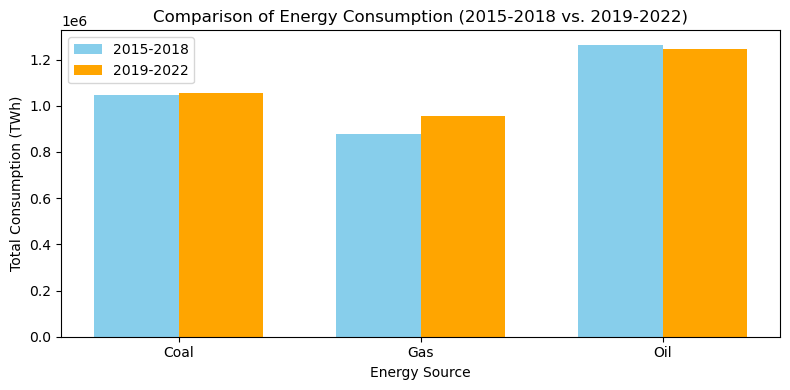

In [38]:
# Load the dataset (replace with your actual file path)
file_path = r'C:\Users\zarap\OneDrive\UofT BootCamp\Class Project\project3_world_energy_consumption\World Energy Consumption - Kaggle\World Energy Consumption.csv'
df = pd.read_csv(file_path)

# Define the years of interest for the two periods
years_group_1 = [2015, 2016, 2017, 2018]
years_group_2 = [2019, 2020, 2021, 2022]

# Calculate total consumption for each energy source for both periods
# Group 1 (2015, 2016, 2017, 2018)
coal_consumption_group_1 = df[df['year'].isin(years_group_1)]['coal_consumption'].sum()
gas_consumption_group_1 = df[df['year'].isin(years_group_1)]['gas_consumption'].sum()
oil_consumption_group_1 = df[df['year'].isin(years_group_1)]['oil_consumption'].sum()

# Group 2 (2019, 2020, 2021, 2022)
coal_consumption_group_2 = df[df['year'].isin(years_group_2)]['coal_consumption'].sum()
gas_consumption_group_2 = df[df['year'].isin(years_group_2)]['gas_consumption'].sum()
oil_consumption_group_2 = df[df['year'].isin(years_group_2)]['oil_consumption'].sum()

# Prepare the data for visualization
categories = ['Coal', 'Gas', 'Oil']
group_1_totals = [coal_consumption_group_1, gas_consumption_group_1, oil_consumption_group_1]
group_2_totals = [coal_consumption_group_2, gas_consumption_group_2, oil_consumption_group_2]

# Create a bar chart to visually compare the total consumption
bar_width = 0.35
index = range(len(categories))

plt.figure(figsize=(8, 4))

# Bars for 2015-2018
plt.bar(index, group_1_totals, bar_width, label='2015-2018', color='skyblue')

# Bars for 2019-2022
plt.bar([i + bar_width for i in index], group_2_totals, bar_width, label='2019-2022', color='orange')

# Add labels, title, and custom ticks
plt.xlabel('Energy Source')
plt.ylabel('Total Consumption (TWh)')
plt.title('Comparison of Energy Consumption (2015-2018 vs. 2019-2022)')
plt.xticks([i + bar_width / 2 for i in index], categories)

# Add a legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()

